<a href="https://colab.research.google.com/github/zihanmanbit/Simple-Linear-Regression-Projects/blob/main/Simple_Linear_Regression_Fuel_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT
- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)).
- Data set:
    - Independant variable X: Vehicle Horse Power
    - Dependant variable Y: Mileage Per Gallon (MPG)

# DATASET
[**FuelEconomy.csv**](./FuelEconomy.csv)

# IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

In [2]:
fueleconomy_df = pd.read_csv("FuelEconomy.csv")

In [3]:
fueleconomy_df

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [4]:
fueleconomy_df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [5]:
fueleconomy_df.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [6]:
fueleconomy_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [7]:
fueleconomy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# VISUALIZING DATASET

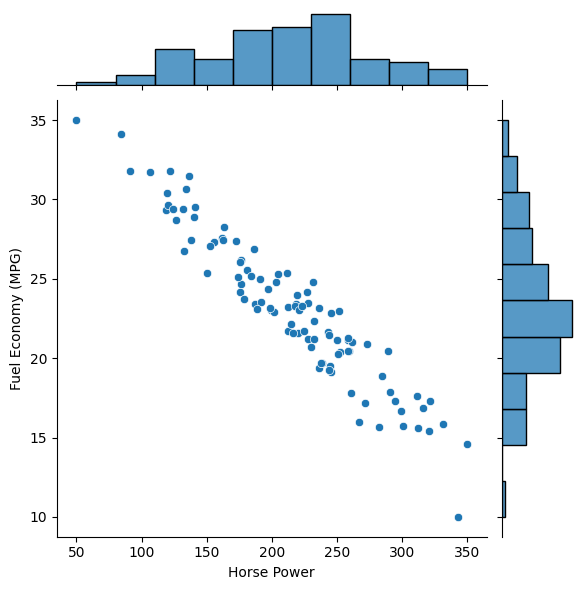

In [8]:
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data = fueleconomy_df)

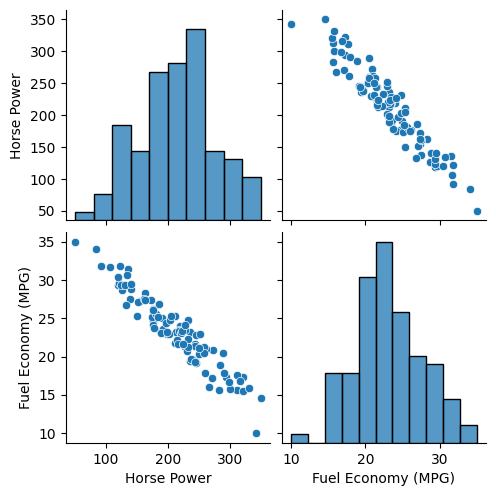

In [9]:
sns.pairplot(fueleconomy_df)

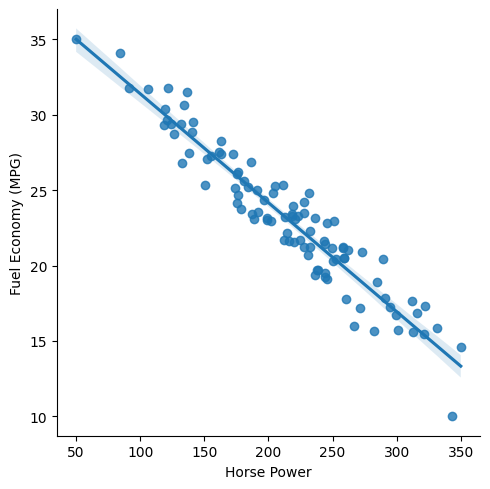

In [10]:
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=fueleconomy_df)

# CREATING TESTING AND TRAINING DATASET

In [11]:
X = fueleconomy_df[['Horse Power']]

In [12]:
y = fueleconomy_df['Fuel Economy (MPG)']

In [13]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [14]:
y

,Fuel Economy (MPG)
0,29.344195
1,24.695934
2,23.952010
3,23.384546
4,23.426739
...,...
95,27.418661
96,15.989945
97,19.253375
98,29.515593


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# TRAINING THE MODEL

In [17]:
X_train.shape

(75, 1)

In [18]:
X_test.shape

(25, 1)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression(fit_intercept =True)

In [21]:
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-0.07195675]
Linear Model Coefficient (b):  38.563654951401546


# TESTING THE MODEL

In [23]:
y_predict = regressor.predict( X_test)
y_predict

array([19.96828901, 25.72439209, 24.05527118, 32.47812966, 22.72607712,
       24.24726222, 28.42064638, 26.14077903, 19.03160039, 18.92624596,
       28.4586028 , 22.18122933, 21.46147336, 20.39080733, 21.37775857,
       24.76848101, 22.16661938, 20.4719659 , 25.53459581, 24.99943242,
       17.7328966 , 21.85410376, 28.93418309, 17.63235889, 20.89398176])

In [24]:
y_test

,Fuel Economy (MPG)
26,21.167343
25,23.719583
58,22.937653
67,34.114025
75,21.582643
80,23.172223
98,29.515593
41,27.387012
6,17.163583
54,20.898080


Text(0.5, 1.0, 'HP vs. MPG (Training dataset)')

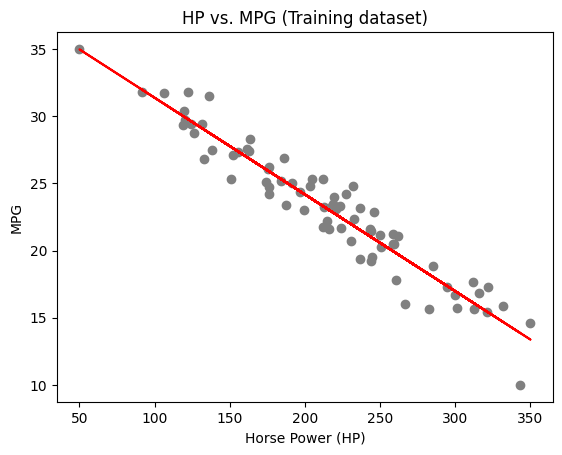

In [25]:
# Visualizing Training Set Results
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Training dataset)')

In [26]:
accuracy_LinearRegression = regressor.score(X_test, y_test)
accuracy_LinearRegression

0.8641619858277505

Text(0.5, 1.0, 'HP vs. MPG (Testing dataset)')

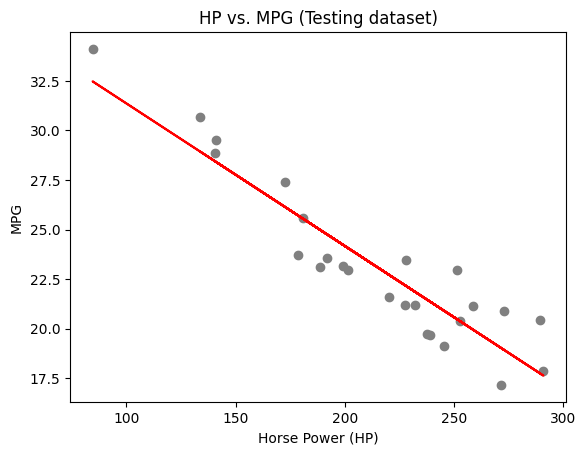

In [27]:
# Visualizing Test Set Results
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Testing dataset)')

In [28]:
# Using the trained model to generate predictions
HP = pd.DataFrame([[240]], columns=['Horse Power'])
y_predict = regressor.predict(HP)
y_predict

array([21.29403614])